<a href="https://colab.research.google.com/github/Praveen-S-24/PS1.15/blob/main/Copy_of_Untitled70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
!pip install catboost


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shankarpriya2913/crop-and-soil-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'crop-and-soil-dataset' dataset.
Path to dataset files: /kaggle/input/crop-and-soil-dataset


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker


Saving data_core.csv to data_core (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("data_core.csv")
df.head()


Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [ ]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
for col in df.columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}', marginal='box')
    fig.show()

In [ ]:
for col in df.columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}', marginal='box')
    fig.show()

In [ ]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
corr_matrix = df[numeric_cols].corr()

fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=numeric_cols,
        y=numeric_cols,
        colorscale='RdBu',
        zmin=-1,
     texttemplate="%{text}",
        zmax=1))
fig.update_layout(title='Correlation Heatmap')
fig.show()


In [ ]:
fig = px.histogram(df, x='Crop Type', title='Count of Each Crop Type', color='Crop Type')
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=numeric_cols, color='Crop Type', title="Scatter Matrix")


fig.update_layout(
    title='Scatter Matrix of Features',
    width=1000,
    height=1000,
    xaxis_tickangle=-45,
    yaxis_tickangle=-45,
    showlegend=True
)

fig.show()


In [ ]:
fig = px.bar(df.groupby('Fertilizer Name')['Nitrogen'].mean().reset_index(),
             x='Fertilizer Name', y='Nitrogen', title='Average Nitrogen by Fertilizer')
fig.show()

In [ ]:
fig = px.scatter(df, x='Nitrogen', y='Phosphorous', color='Crop Type',
                 title='Nitrogen vs Phosphorous by Crop Type')
fig.show()

In [ ]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
fig = px.scatter(df, x='Temparature', y='Humidity', color='Crop Type', title="Temperature vs Humidity")
fig.show()

In [ ]:
fig = px.scatter(df, x='Temparature', y='Moisture', color='Soil Type', title="Temperature vs Soil Moisture")
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='Temparature', y='Moisture', z='Soil Type', color='Crop Type', title="Temperature, Soil Moisture and Soil Type")
fig.show()

In [ ]:
fig = px.box(df, x='Soil Type', y='Crop Type', title="Crop Type vs Soil Type")
fig.show()

In [ ]:
df['Fertility Index'] = (df['Nitrogen'] + df['Potassium'] + df['Phosphorous']) / 3

fig = px.box(df, x='Soil Type', y='Fertility Index', color='Crop Type', title="Fertility Index vs Soil Type and Crop Type")
fig.show()

In [ ]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name',
       'Fertility Index'],
      dtype='object')

In [ ]:
for i in ['Soil Type', 'Crop Type','Fertilizer Name']:
    print(i,'=========>    ',set(df[i]))

Soil Type =========>     {'Clayey', 'Loamy', 'Black', 'Red', 'Sandy'}
Crop Type =========>     {'Cotton', 'Barley', 'Millets', 'Maize', 'Pulses', 'Paddy', 'Ground Nuts', 'Sugarcane', 'Wheat', 'Tobacco', 'Oil seeds'}
Fertilizer Name =========>     {'14-35-14', '17-17-17', 'Urea', '28-28', '20-20', 'DAP', '10-26-26'}


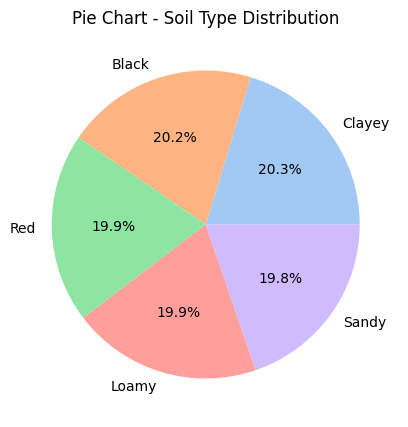

In [ ]:
plt.figure(figsize=(8, 5))
df["Soil Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Pie Chart - Soil Type Distribution")
plt.ylabel("")
plt.show()

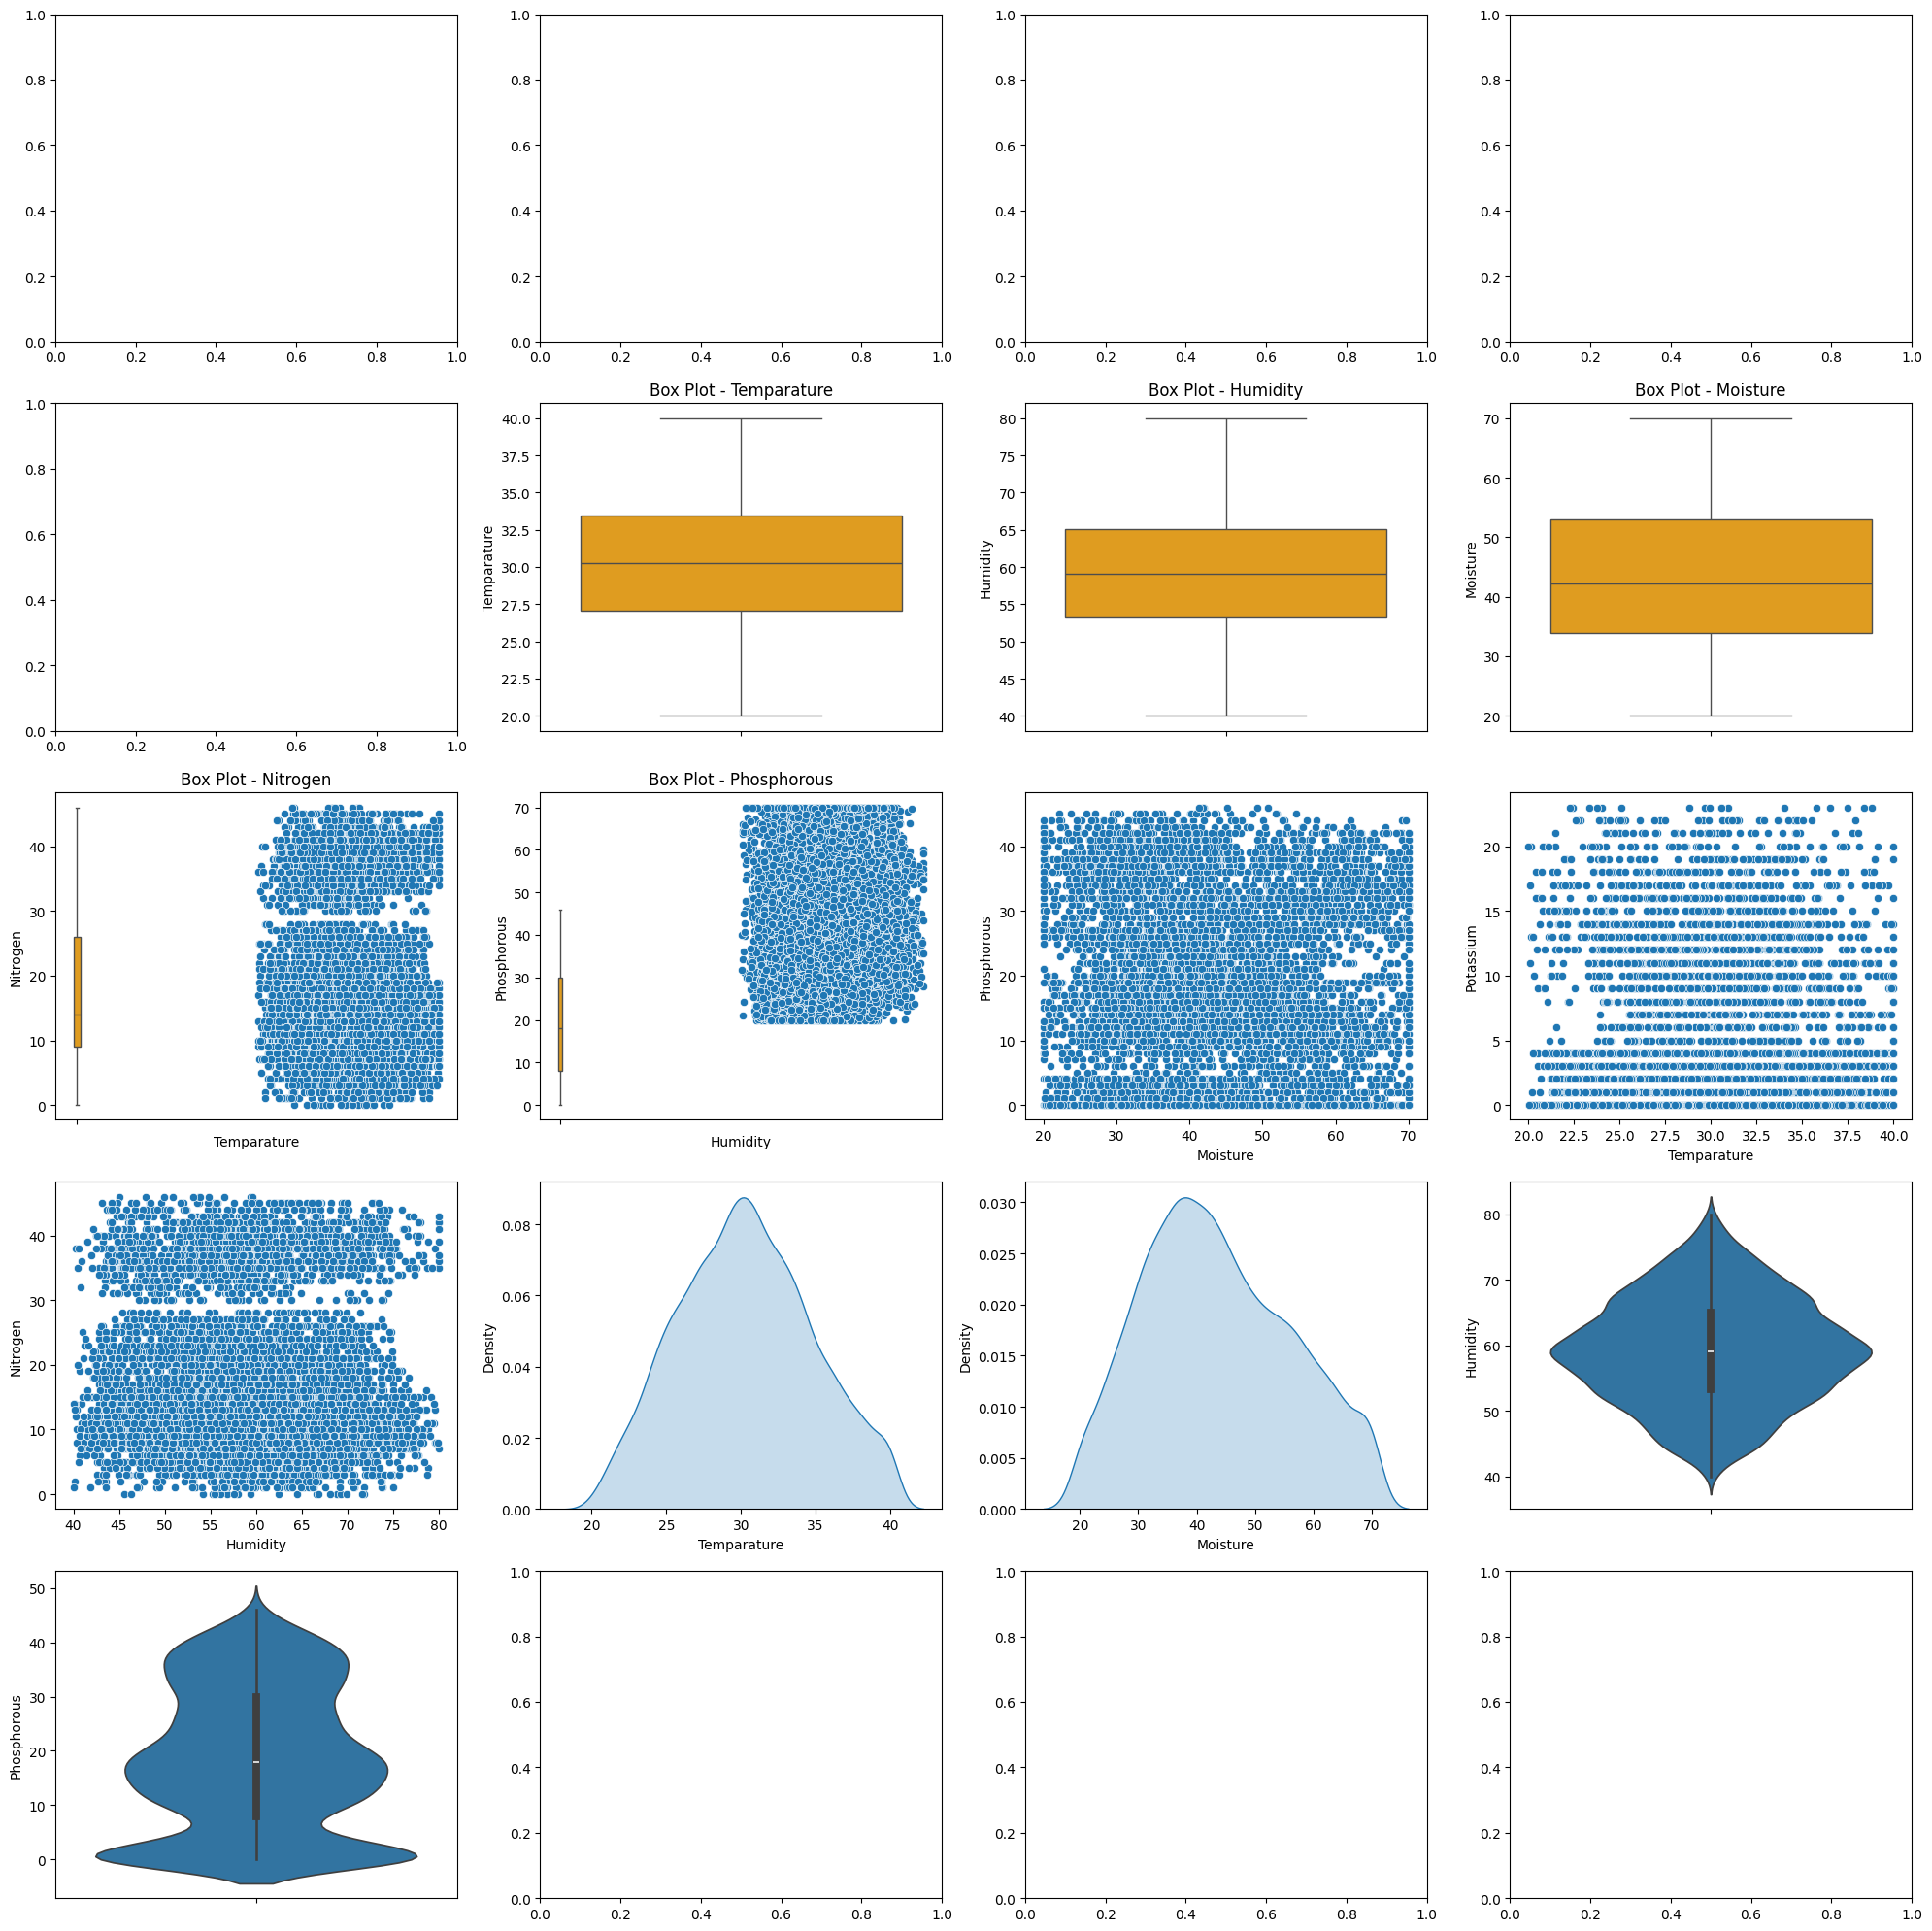

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
columns_to_plot = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Phosphorous"]
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], color="orange", ax=axes[(i + 5) // 4, (i + 5) % 4])
    axes[(i + 5) // 4, (i + 5) % 4].set_title(f"Box Plot - {col}")

sns.scatterplot(x="Temparature", y="Nitrogen", data=df, ax=axes[2, 0])
sns.scatterplot(x="Humidity", y="Moisture", data=df, ax=axes[2, 1])
sns.scatterplot(x="Moisture", y="Phosphorous", data=df, ax=axes[2, 2])
sns.scatterplot(x="Temparature", y="Potassium", data=df, ax=axes[2, 3])
sns.scatterplot(x="Humidity", y="Nitrogen", data=df, ax=axes[3, 0])

sns.kdeplot(df["Temparature"], fill=True, ax=axes[3, 1])
sns.kdeplot(df["Moisture"], fill=True, ax=axes[3, 2])
sns.violinplot(y=df["Humidity"], ax=axes[3, 3])
sns.violinplot(y=df["Phosphorous"], ax=axes[4, 0])

plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = ["Soil Type", "Crop Type", "Fertilizer Name"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

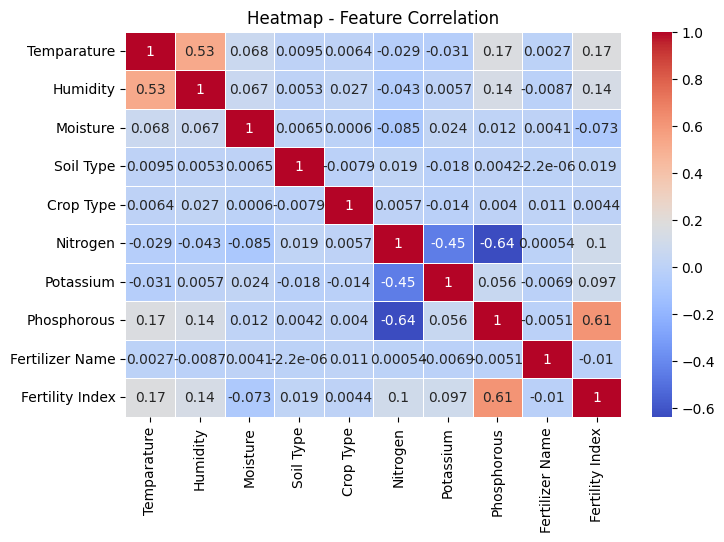

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap - Feature Correlation")
plt.show()

In [ ]:
X = df.drop(columns=["Fertilizer Name","Crop Type"])
y = df["Crop Type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [ ]:
accuracies = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 947
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 8
[LightGBM] [Info] Start training from score -2.437904
[LightGBM] [Info] Start training from score -2.399303
[LightGBM] [Info] Start training from score -2.389028
[LightGBM] [Info] Start training from score -2.357173
[LightGBM] [Info] Start training from score -2.420173
[LightGBM] [Info] Start training from score -2.441488
[LightGBM] [Info] Start training from score -2.436116
[LightGBM] [Info] Start training from score -2.362136
[LightGBM] [Info] Start training from score -2.385627
[LightGBM] [Info] Start training from score -2.389028
[LightGBM] [Info] Start training from score -2.363796


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



In [ ]:
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.0956
Logistic Regression Accuracy: 0.0919
SVM Accuracy: 0.0963
KNN Accuracy: 0.0856
Decision Tree Accuracy: 0.0919
Gradient Boosting Accuracy: 0.0869
AdaBoost Accuracy: 0.0919
XGBoost Accuracy: 0.0850
LightGBM Accuracy: 0.0988
CatBoost Accuracy: 0.0912
